In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pulp
#for davis dataset 
#rabi=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\Rabi_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")#davis data 
#for davis 
#kharif=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\kharif_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")

#adding water in using hoestra data 
kharif=pd.read_csv(r"E:\crop_switchning\fig2\code_final\kharif_waterdemand.csv")
rabi=pd.read_csv(r"E:\crop_switchning\fig2\code_final\rabi_waterdemand.csv")
CoP= pd.read_csv(r"E:\crop_switchning\cost_of_production.csv")
bnf_applied= pd.read_csv(r"E:\crop_switchning\bnf\bnf_app.csv")
# Convert 'State' and 'Crop' column values to lowercase
CoP['State'] = CoP['State'].str.strip().str.lower()
CoP['Crop'] = CoP['Crop'].str.strip().str.lower()

# Now, the 'State' and 'Crop' columns in CoP DataFrame have all their values in lowercase
# Rename the columns in CoP to match kharif DataFrame for a consistent merge
CoP_renamed = CoP.rename(columns={"Crop": "crop", "State": "state", "CostofProduction_rs_Quintal": "Cost_of_Production_rs_Quintal"})
# Perform the merge
kharif = pd.merge(kharif, CoP_renamed, how='left', on=['state', 'Year', 'crop'])


In [2]:
import pandas as pd

# Sample data to illustrate the process. The actual data is not shown due to the format of the question.
# These dictionaries represent the mapping from atm['State'] to kharif['state'] based on the provided examples.
state_name_mapping = {
    'Andaman and Nicobar': 'andaman and nicobar',
    'Andhra Pradesh': 'andhra pradesh',
    'Arunachal Pradesh': 'arunachal pradesh',
    'Assam': 'assam',
    'Bihar': 'bihar',
    'Chandigarh': 'chandigarh',
    'Chhattisgarh': 'chhattisgarh',
    'Dadra and Nagar Haveli': 'dadra and nagar haveli',
    'Daman and Diu': 'the dadra and nagar haveli and daman and diu', # Assuming both to be mapped to the single entry in kharif
    'Delhi': 'delhi', # Not present in the provided kharif states list, but added for completeness
    'Goa': 'goa', # Not present in the provided list, but added for completeness
    'Gujarat': 'gujarat',
    'Haryana': 'haryana',
    'Himachal Pradesh': 'himachal pradesh',
    'Jammu and Kashmir': 'jammu and kashmir',
    'Jharkhand': 'jharkhand',
    'Karnataka': 'karnataka',
    'Kerala': 'kerala',
    'Lakshadweep': 'lakshadweep', # Not present, but added for completeness
    'Madhya Pradesh': 'madhya pradesh',
    'Maharashtra': 'maharashtra',
    'Manipur': 'manipur',
    'Meghalaya': 'meghalaya',
    'Mizoram': 'mizoram',
    'Nagaland': 'nagaland',
    'Orissa': 'odisha',
    'Puducherry': 'puducherry',
    'Punjab': 'punjab',
    'Rajasthan': 'rajasthan',
    'Sikkim': 'sikkim',
    'Tamil Nadu': 'tamil nadu',
    'Telangana': 'telangana',
    'Tripura': 'tripura',
    'Uttar Pradesh': 'uttar pradesh',
    'Uttaranchal': 'uttarakhand', # Mapped to 'uttarakhand' as per provided list
    'West Bengal': 'west bengal',
}

# Assume atm_df and kharif_df are the DataFrames for the 'atm' and 'kharif' datasets, respectively.
# This code will update the 'State' column in atm_df to match the 'state' values in kharif_df.

# Example atm_df DataFrame creation
# This is a placeholder and should be replaced with the actual atm DataFrame in practice.
atm_df= pd.read_csv(r"E:\crop_switchning\fig2\code_final\atmospheric_depo_isimip_2a.csv")   # kg/ha

# Update 'State' in atm_df to match 'state' in kharif_df using the mapping
atm_df['State'] = atm_df['State'].map(state_name_mapping)
# Renaming 'State' in atm_df to 'state' to match kharif_df column name for a consistent merge
atm_df.rename(columns={'State': 'state'}, inplace=True)
# Assuming kharif_df exists, the merge operation would look like this:
# merged_df = pd.merge(kharif_df, atm_df, left_on='state', right_on='State')

# Displaying the updated atm_df for verification
atm_df


,Year,state,atm_depo
0,2009,andaman and nicobar,0.000000
1,2010,andaman and nicobar,0.000000
2,2011,andaman and nicobar,0.000000
3,2012,andaman and nicobar,0.000000
4,2013,andaman and nicobar,0.000000
...,...,...,...
427,2020,telangana,1.447027
428,2020,tripura,1.309994
429,2020,uttar pradesh,1.855148
430,2020,uttarakhand,1.651030


In [3]:
# Performing the merge based on 'state' and 'Year'
kharif = pd.merge(kharif, atm_df, on=['state', 'Year'], how='left')
kharif = pd.merge(kharif, bnf_applied, on=[ 'Year'], how='left')
#coeff from image mmodel 

image_coeff= pd.read_csv(r"E:\network restructurong\trial_analysis\image_coeff.csv")
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['State'] = image_coeff['State'].str.lower().str.strip()
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['fn2o'] = image_coeff['fn2o'] / 100    # as the value provided is in percentage 
image_coeff['fno3'] = image_coeff['fno3'] / 100

#image_coeff.rename(columns={'State':'state'}, inplace=True)
# Create a mapping dictionary from the abbreviated state names to the full state names
state_mapping = {
     'the dadra and nagar haveli and daman and diu':'dadra and nagar haveli',
    'andaman and nicobar islands':'andaman and nicobar'
}

# Use the 'replace' method to update the 'State' column in cwc_crop
image_coeff['State'] = image_coeff['State'].replace(state_mapping)
image_coeff.rename(columns={'State': 'state'}, inplace=True)
kharif = pd.merge(kharif, image_coeff, on=[ 'state'], how='left')


In [4]:

del kharif['Unnamed: 0']
del rabi['Unnamed: 0']
#manure nitrogen 
kharif['Manure (N_kg/ha)']=kharif['Manure (kg/ha)']*.005   #  https://agritech.tnau.ac.in/org_farm/orgfarm_manure.html
kharif['Manure (P_kg/ha)']=kharif['Manure (kg/ha)']*.002

rabi['Manure (N_kg/ha)']=rabi['Manure (kg/ha)']*.005
rabi['Manure (P_kg/ha)']=rabi['Manure (kg/ha)']*.002

# Ensure columns are numeric
kharif['N_applied(kg/ha)'] = pd.to_numeric(kharif['N_applied(kg/ha)'], errors='coerce')
kharif['Manure (N_kg/ha)'] = pd.to_numeric(kharif['Manure (N_kg/ha)'], errors='coerce')
kharif['P_applied(kg/ha)'] = pd.to_numeric(kharif['P_applied(kg/ha)'], errors='coerce')
kharif['Manure (P_kg/ha)'] = pd.to_numeric(kharif['Manure (P_kg/ha)'], errors='coerce')
kharif['Manure (N_kg/ha)'] = pd.to_numeric(kharif['Manure (N_kg/ha)'], errors='coerce')
kharif['CWR m3/ha'] = pd.to_numeric(kharif['CWR m3/ha'], errors='coerce')
kharif['CWU green m3/ha'] = pd.to_numeric(kharif['CWU green m3/ha'], errors='coerce')
kharif['CWU blue m3/ha'] = pd.to_numeric(kharif['CWU blue m3/ha'], errors='coerce')
# Replace 0 with np.nan using np.where
kharif['N_applied(kg/ha)'] = np.where(kharif['N_applied(kg/ha)'] == 0, np.nan, kharif['N_applied(kg/ha)'])
kharif['Manure (N_kg/ha)'] = np.where(kharif['Manure (N_kg/ha)'] == 0, np.nan, kharif['Manure (N_kg/ha)'])
kharif['P_applied(kg/ha)'] = np.where(kharif['P_applied(kg/ha)'] == 0, np.nan, kharif['P_applied(kg/ha)'])
kharif['Manure (P_kg/ha)'] = np.where(kharif['Manure (P_kg/ha)'] == 0, np.nan, kharif['Manure (P_kg/ha)'])
kharif['CWR m3/ha']  = np.where(kharif['CWR m3/ha'] == 0, np.nan, kharif['CWR m3/ha'])
kharif['CWU green m3/ha'] = np.where(kharif['CWU green m3/ha'] == 0, np.nan, kharif['CWU green m3/ha'])
kharif['CWU blue m3/ha'] = np.where(kharif['CWU blue m3/ha'] == 0, np.nan, kharif['CWU blue m3/ha'])

# Replace 'inf' with 'np.nan' in specified columns
kharif['N_applied(kg/ha)'] = kharif['N_applied(kg/ha)'].replace([np.inf, -np.inf], np.nan)
kharif['P_applied(kg/ha)'] = kharif['P_applied(kg/ha)'].replace([np.inf, -np.inf], np.nan)
kharif['K_applied(kg/ha)'] = kharif['K_applied(kg/ha)'].replace([np.inf, -np.inf], np.nan)

#calculating n app rate 
kharif['net_N_applied(kg/ha)']=kharif['N_applied(kg/ha)']+kharif['Manure (N_kg/ha)'] + kharif['atm_depo'] +kharif['BNF_kg_per_hec'] 

kharif['net_P_applied(kg/ha)']=kharif['P_applied(kg/ha)']+kharif['Manure (P_kg/ha)'] 



kharif_max=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\kharif_max.csv")
del kharif_max['Unnamed: 0']



In [5]:
# IF FOLLOWING FAO FAOSTAT Domain Cropland Nutrient Budget Metadata, release November 2022
#https://www.fao.org/faostat/en/#data/ESB
# Define the nitrogen content dictionary (as provided previously)  # value in kg per kg product
crop_nitrogen_content = {
    'rice': .0129,
    'jowar': .0146,   # SORGHUM
    'bajra': .0204,
    'maize': .0124,
    'ragi': .0204
   # ,'wheat':.0209
}


crop_phosphorous_content = {
    'rice': .0028,
    'jowar': .0045,   # SORGHUM
    'bajra': .0042,
    'maize': .0034,
    'ragi': .0042
    #,'wheat':.0042
}

# Create the n_removed column by multiplying PRODUCTION (kg) by nitrogen content
kharif['n_removed_rate'] = kharif.apply(lambda row:crop_nitrogen_content.get(row['crop'], 0), axis=1)


# Create the p_removed column by multiplying PRODUCTION (kg) by nitrogen content
kharif['p_removed_rate'] = kharif.apply(lambda row:crop_phosphorous_content.get(row['crop'], 0), axis=1)
# Replace 0s with NaN in ''CWR m3/ha'' column
kharif['CWR m3/ha'].replace(0, float('nan'), inplace=True)


In [6]:
#getting year specific data 
kharif_2017 = kharif[kharif['Year'].isin([2017])]

# Calculate the crop-specific average values for each nutrient
avg_nutrients = kharif_2017.groupby('crop')[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].transform('mean')

# Fill NaN values in kharif with the crop-specific average values
kharif_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = kharif_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)

avg_wat=kharif_2017.groupby(['state','crop'])[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].transform('mean')
kharif_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']] = kharif_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].fillna(avg_wat)


C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\1332071418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kharif_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = kharif_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)
C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\1332071418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kharif_2017[[

In [7]:
# Assuming rabi_2017 is your DataFrame
kharif_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
kharif_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)

#calculating n app rate 
#calculating n app rate 
kharif_2017['net_N_applied(kg/ha)']=kharif_2017['N_applied(kg/ha)']+kharif_2017['Manure (N_kg/ha)'] + kharif_2017['atm_depo'] +kharif_2017['BNF_kg_per_hec'] 

kharif_2017['net_P_applied(kg/ha)']=kharif_2017['P_applied(kg/ha)']+kharif_2017['Manure (P_kg/ha)'] 


#finding historical area 
# Grouping the data by state, district, and crop and summing the area
historical_cereal_area = kharif.groupby(['state', 'district', 'crop'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
historical_cereal_area_dict = historical_cereal_area.to_dict()

#historiccally maximum area 
# Grouping the data by state and district and summing the area to find the maximum historical area
total_historical_area_district = kharif.groupby(['state', 'district','Year'])['Area (Hectare)'].sum()
max_historical_area_district = kharif.groupby(['state', 'district'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
max_historical_area_district_dict = max_historical_area_district.to_dict()

# Display the first few elements of the dictionary to verify
list(max_historical_area_district_dict.items())[:5]




C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\3883408602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kharif_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\3883408602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kharif_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\3883408602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

[(('andaman and nicobar', 'nicobars'), 3.247),
 (('andaman and nicobar', 'north and middle andaman'), 6199.9169999999995),
 (('andaman and nicobar', 'south andamans'), 415.741),
 (('andhra pradesh', 'adilabad'), 30125.416666666668),
 (('andhra pradesh', 'anantapur'), 12385.51923076923)]

In [8]:
kharif_2017

,state,district,Year,Season,crop,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare),N_applied(kg/ha),P_applied(kg/ha),...,atm_depo,BNF_kg_per_hec,fn2o,fno3,Manure (N_kg/ha),Manure (P_kg/ha),net_N_applied(kg/ha),net_P_applied(kg/ha),n_removed_rate,p_removed_rate
8,tamil nadu,ariyalur,2017,Kharif,rice,22184.0,97078.0,4.376037,119.965022,57.702215,...,0.638496,31.8908,0.0342,0.3326,5.486005,2.194402,157.980323,59.896617,0.0129,0.0028
19,tamil nadu,coimbatore,2017,Kharif,rice,680.0,2326.0,3.420588,85.278736,40.002874,...,0.638496,31.8908,0.0342,0.3326,54.683908,21.873563,172.491939,61.876437,0.0129,0.0028
30,tamil nadu,cuddalore,2017,Kharif,rice,123810.0,531128.0,4.289864,140.576469,50.437033,...,0.638496,31.8908,0.0342,0.3326,12.748858,5.099543,185.854622,55.536576,0.0129,0.0028
41,tamil nadu,dharmapuri,2017,Kharif,rice,17272.0,82897.0,4.799502,131.086253,60.270607,...,0.638496,31.8908,0.0342,0.3326,1.023795,0.409518,164.639344,60.680125,0.0129,0.0028
52,tamil nadu,dindigul,2017,Kharif,rice,5310.0,29460.0,5.548023,126.627828,58.382787,...,0.638496,31.8908,0.0342,0.3326,0.483857,0.193543,159.640981,58.576329,0.0129,0.0028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,tripura,unakoti,2017,Kharif,jowar,30.0,24.0,0.800000,54.187786,28.763893,...,1.309994,31.8908,0.0335,0.5936,0.000000,0.000000,87.388581,28.763893,0.0146,0.0045
21588,tripura,unakoti,2017,Kharif,rice,21288.0,62915.0,2.955421,96.939507,48.530814,...,1.309994,31.8908,0.0335,0.5936,0.000000,0.000000,130.140301,48.530814,0.0129,0.0028
21612,tripura,west tripura,2017,Kharif,maize,1890.0,2639.0,1.396296,85.485132,43.550330,...,1.309994,31.8908,0.0335,0.5936,0.000000,0.000000,118.685926,43.550330,0.0124,0.0034
21613,tripura,west tripura,2017,Kharif,jowar,60.0,50.0,0.833333,54.187786,28.763893,...,1.309994,31.8908,0.0335,0.5936,0.000000,0.000000,87.388581,28.763893,0.0146,0.0045


C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\138802855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'district': 'District'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\138802855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'state': 'State'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_26436\138802855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

All NaN values filled
Original Total Nitrogen Applied kg: 7073088064.064436
Original Total Nitrogen Surplus generated kg: 5235454712.077641
Original Total Nitrogen leach generated kg: 1662459417.7971733
Original Total Nitrogen emission generated kg: 181665238.16952574
Original Total phosphorus Applied kg: 2423340912.760707
Original Total phosphorus Surplus generated kg: 2007332811.103106
Original Total water Applied: 357578043601.2223


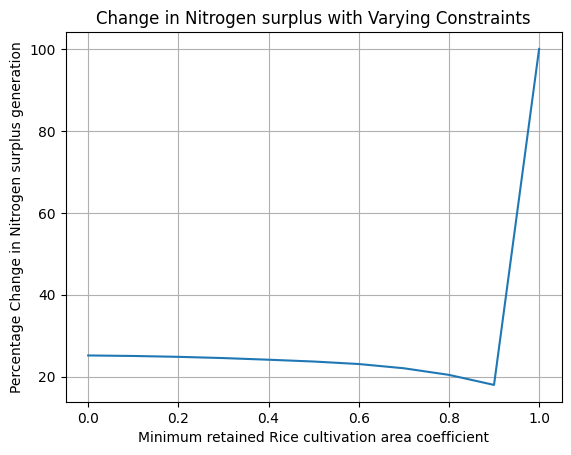

In [30]:
df = kharif_2017
#del df['Unnamed: 0']
# Renaming the column
df.rename(columns={'district': 'District'}, inplace=True)
df.rename(columns={'state': 'State'}, inplace=True)
df.rename(columns={'crop': 'Crop'}, inplace=True)


#finding maximum area 
kharif_max.rename(columns={'district': 'District'}, inplace=True)
kharif_max.rename(columns={'state': 'State'}, inplace=True)
kharif_max.rename(columns={'crop': 'Crop'}, inplace=True)
kharif_max['Crop'] = kharif_max['Crop'].str.lower().str.strip()




 #  only rabi crop 
# Step 1: Filter the DataFrame
selected_crops = ['bajra', 'jowar', 'ragi', 'rice'
                  ,'maize'
                  ]
df = df[df['Crop'].isin(selected_crops)]
kharif_max = kharif_max[kharif_max['Crop'].isin(selected_crops)]


# Step 2: Create a dictionary for maximum area constraints
max_area_constraints = kharif_max.set_index(['State','District', 'Crop'])['Area (Hectare)'].to_dict()

# Convert to lowercase and strip whitespace
df['District'] = df['District'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()
df['Crop'] = df['Crop'].str.lower().str.strip()

#fillin nan value in applied n with national avg 
#filling the nan values in the n application rate with state and crop avg value 
# Compute the average for 'N_applied(kg/ha)' grouped by 'State' and 'Crop'
avg_N_applied = df.groupby(['Crop'])['net_N_applied(kg/ha)'].transform('mean')
global_avg=kharif.groupby(['crop'])['net_N_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_N_applied(kg/ha)' with the computed average
df['net_N_applied(kg/ha)'].fillna(avg_N_applied, inplace=True)
if df['net_N_applied(kg/ha)'].isnull().any():
    df['net_N_applied(kg/ha)'].fillna(global_avg, inplace=True)  # Fallback to global average if needed

#fillin nan value in applied p with national avg 
avg_P_applied = df.groupby(['Crop'])['net_P_applied(kg/ha)'].transform('mean')
global_avg_P=kharif.groupby(['crop'])['net_P_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_P_applied(kg/ha)' with the computed average
df['net_P_applied(kg/ha)'].fillna(avg_P_applied, inplace=True)
if df['net_P_applied(kg/ha)'].isnull().any():
    df['net_P_applied(kg/ha)'].fillna(global_avg_P, inplace=True)  # Fallback to global average if needed


#filling cost of cultivattion with avg vallue 
# Step 1
avg_cost_cult = df.groupby('Crop')['CostofCultivation_rs_ha'].transform('mean')

# Step 2
df['CostofCultivation_rs_ha'].fillna(avg_cost_cult, inplace=True)

# Step 3
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after local crop average fill")

    # Step 4
    global_avg_cost_cult = kharif.groupby('crop')['CostofCultivation_rs_ha'].transform('mean')

    # Step 5
    df['CostofCultivation_rs_ha'].fillna(global_avg_cost_cult, inplace=True)

# Step 6
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after global average fill")
else:
    print("All NaN values filled")
    
# replace all occurrences of -1 in the 'AREA (1000 ha)' and 'PRODUCTION (1000 tons)' columns with zero   which signifies missing values 
df['Area (Hectare)'] = df['Area (Hectare)'].replace(-1, 0)
df['Production (Tonnes)'] = df['Production (Tonnes)'].replace(-1, 0)
df['YIELD (Kg per ha)'] = 1000*df['Yield (Tonnes/Hectare)'].replace(-1, 0)
#compute avg water requiremment 
avg_applied_CWR = df.groupby(['Crop'])['CWR m3/ha'].transform('mean')
global_avg_cwr=kharif.groupby(['crop'])['CWR m3/ha'].transform('mean')
# Replace NaN values in 'CWR m3/ha' with the computed average
df['CWR m3/ha'].fillna(avg_applied_CWR, inplace=True)
if df['CWR m3/ha'].isnull().any():
    df['CWR m3/ha'].fillna(global_avg_cwr, inplace=True)  # Fallback to global average if needed

df['CWR m3/ha'] = df['CWR m3/ha'].fillna(0)

#setting yield 
yield_data = df.set_index(['State','District', 'Crop'])['YIELD (Kg per ha)'].to_dict()

# Calorie data (converted to per tonne)  
# in kcal 
#calorie_per_100g = {
    #'ragi': 328,
    #'bajra': 361,
    #'rice': 345,
    #'jowar': 349,
    #'wheat': 346,
    #'maize': 342
    #,'barley': 352
#}
calorie_per_100g = {
    'ragi': 321,
    'bajra': 348,
    'rice': 356,
    'jowar': 334,
    'wheat': 322
    ,'maize': 342
    #,'barley': 352
}
#calorie_per_tonne = {cereal: value * 10000 for cereal, value in calorie_per_100g.items()}   # in 1000TONNE   chnage  calorie_per_tonneto  calorie_per_kg
calorie_per_kg = {cereal: value * 10 for cereal, value in calorie_per_100g.items()}   # in kg   chnage  calorie_per_tonneto  calorie_per_kg


#aghg Per-Area Total (Mg CO2e ha-1) 2017
# Dictionary mapping crop names to their corresponding values   
crop_co2e = { 
    'bajra': 0.098603856,
    'ragi': 0.098603856,
    'rice': 8.213913103,
    'jowar': 0.154967254,
    'wheat': 0.729809876,
    'maize': 0.889859651
}

AGHG_per_ha = {cereal: value for cereal, value in crop_co2e.items()}   # in (Mg CO2e ha-1)


# Calculate Total Calorie Supply for Each District-Cereal Combination
#df['Calorie Supply (per tonne)'] = df['Crop'].map(calorie_per_tonne)
df['Calorie Supply (per KG)'] = df['Crop'].map(calorie_per_kg)   # crop wise calorie mapping
#total aghg produced in india 
df['AGHG_produced (per ha)'] = df['Crop'].map(AGHG_per_ha)   # crop wise aghg mapping (Mg CO2e ha-1) 2017

df['Total Calorie Supply'] =1000*df['Production (Tonnes)'] * df['Calorie Supply (per KG)']   # IN KG
df['Total Farmer Cost'] = 10*df['Production (Tonnes)'] * df['Cost_of_Production_rs_Quintal']  # as area is in 1000ha    

#calculate total selling price for each district-cereal combination
#data['MSP Supply (per tonne)'] = data['Crop'].map(msp_per_tonne)
df['Total MSP Supply'] = 10*df['Production (Tonnes)'] * df['MSP_RsperQntl']  # tonne to qut factor is 10 10000 to convert 1000ton
df['Total initial profit']=df['Total MSP Supply'] - df['Total Farmer Cost']
#data.head(4)

# Extract Data into Dictionaries
districts = df['District'].unique().tolist()
states = df['State'].unique().tolist()
cereals = df['Crop'].unique().tolist()


#current_area = df.set_index('District')['AREA (1000 ha)'].to_dict()  # this was wrong as it was giving only last district area 
current_area = df.groupby(['State','District'])['Area (Hectare)'].sum().to_dict() # this gives sum of all the area of all crops in the district

#nitrogen_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
nitrogen_rate = df.set_index(['State','District', 'Crop'])['net_N_applied(kg/ha)'].to_dict()
nitrogen_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['n_removed_rate'].to_dict()
#NITROGEN LEACH 
nitrogen_leach_rate_perkg=df.set_index(['State','District', 'Crop'])['fno3'].to_dict()   # this is to be multipkied by the surplus value that we are getting for each disstrict as we are assuming the leaching is same 
#nitrogen emission 
nitrogen_emission_rate_perkg=df.set_index(['State','District', 'Crop'])['fn2o'].to_dict()
#AGHG_rate                                       #Mg CO2e ha-1
#phosphorous_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
P_rate = df.set_index(['State','District', 'Crop'])['net_P_applied(kg/ha)'].to_dict()
P_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['p_removed_rate'].to_dict()

#water requirement 
water_rate = df.set_index(['State','District', 'Crop'])['CWR m3/ha'].to_dict()

#calories_per_area = data.set_index(['District', 'Crop'])['Calorie Supply (per tonne)'].to_dict()   # need tocheck as it should be calorie per unit production
calories_per_prod = df.set_index(['State','District', 'Crop'])['Calorie Supply (per KG)'].to_dict()   # this is to be multiplieed by the production value 
#aghg
AGHG_per_ha = df.set_index(['State','District', 'Crop'])['AGHG_produced (per ha)'].to_dict()   # this is to be multiplieed by the area  # crop wise aghg mapping (Mg CO2e ha-1) 2017 

district_to_state = df.set_index('District')['State'].to_dict()

cost_per_area = df.set_index(['State','District', 'Crop'])['Cost_of_Production_rs_Quintal'].to_dict()   # in ha   # cosyt of cultivation

MSP_per_prod = df.set_index(['State','District', 'Crop'])['MSP_RsperQntl'].to_dict()   # in quintal
current_cereal_area = {}
for index, row in df.iterrows():
    current_cereal_area[row['State'],row['District'], row['Crop']] = row['Area (Hectare)']    # in ha

current_cereal_prod = {}
for index, row in df.iterrows():
    current_cereal_prod[row['State'],row['District'], row['Crop']] = row['Production (Tonnes)']


#current applied nitrogen value 
original_nitrogen_values = [current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_nitrogen_values)  # This will give the individual nitrogen applications for each district-cereal combo
original_N_surplus_value=[(current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total n applied 
original_total_nitrogen = sum(original_nitrogen_values) # nitrogen applied 
original_N_surplus=  sum(original_N_surplus_value)  # surplus kg
#nitrogen leach 
origina_N_leach_value=[nitrogen_leach_rate_perkg.get((s,d, c), 0)*((current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))  for s in states for d in districts for c in cereals]
original_N_leach=  sum(origina_N_leach_value)  # leach kg

original_N_emission_value= [nitrogen_emission_rate_perkg.get((s,d, c), 0)*((current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))  for s in states for d in districts for c in cereals]
original_N_emission=  sum(original_N_emission_value)  # leach kg
print("Original Total Nitrogen Applied kg:", original_total_nitrogen)
print("Original Total Nitrogen Surplus generated kg:", original_N_surplus)
print("Original Total Nitrogen leach generated kg:", original_N_leach)
print("Original Total Nitrogen emission generated kg:", original_N_emission)


#current applied phosphorous value 
original_P_values = [current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_p_values)  # This will give the individual p applications for each district-cereal combo
original_P_surplus_value=[(current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*P_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total p applied 
original_total_P = sum(original_P_values) # nitrogen applied 
original_P_surplus=  sum(original_P_surplus_value)  # surplus kg

print("Original Total phosphorus Applied kg:", original_total_P)
print("Original Total phosphorus Surplus generated kg:", original_P_surplus)


#originall water required
original_water_values = [current_cereal_area.get((s,d, c), 0) * water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print total water required 
#total n applied 
original_total_water = sum(original_water_values)
print("Original Total water Applied:", original_total_water)
# Calculate the current area of rice for each state.
#initial_wheat_area_by_state = df[df['Crop'] == 'wheat'].groupby('State')['Area (Hectare)'].sum().to_dict()
initial_rice_area_by_state = df[df['Crop'] == 'rice'].groupby('State')['Area (Hectare)'].sum().to_dict()

# Results dictionary to store optimized nitrogen for each coefficient
optimized_results = {}
percentage_changes = []
# Define the trade-off parameter
#coefficients = [i/100 for i in range(1, 85)]
# Calculate the current area of rice for each state.
#initial_wheat_area_by_state = df[df['Crop'] == 'wheat'].groupby('State')['Area (Hectare)'].sum().to_dict()
initial_rice_area_by_state = df[df['Crop'] == 'rice'].groupby('State')['Area (Hectare)'].sum().to_dict()
# Define the trade-off parameter
#coefficients = [i/100 for i in range(1, 85)]
alpha = 1 # Adjust these values to explore different trade-offs
N_results = []

results = []
#coefficients = [i/10 for i in range(1, 9)]
# Loop through the coefficients from 0.1 to 0.9 (inclusive) in steps of 0.1
# Decision Variables Initialization (Moved Up)
x = pulp.LpVariable.dicts("Area (Hectare)", (states, districts, cereals), 0, None, pulp.LpContinuous)  # this is in ha

# Objective Functions Initialization (After `x`)
objective_nitrogen = pulp.lpSum([x[s][d][c]*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0) * nitrogen_removal_rate_perkg.get((s, d, c), 0))) for s in states for d in districts for c in cereals])   # for minimizing n surplus

objective_water = pulp.lpSum([x[s][d][c]* water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals])

# Define gamma values
gamma_values = [i/10 for i in range(0, 11)]  # 0 to 1 at 0.1 interval

# Store results in a nested dictionary
nested_results = {gamma: [] for gamma in gamma_values}

# Loop through gamma values
for gamma in gamma_values:
    prob = pulp.LpProblem("MultiObjectiveOptimization", pulp.LpMinimize)
    objective_combined = alpha * objective_nitrogen + (1 - alpha) * objective_water
    prob += objective_combined
    #print(prob)
    # Constraints
    # Cropped Area Constraints    net area in the district within a state should remain same 
    for s in states:
        for d in districts:
            prob += pulp.lpSum([x[s][d][c] for c in cereals]) == current_area.get((s,d), 0)
    # Existing Cereal Constraints   
    # Replacement should happen when only crop is present 
    for s in states:
        for d in districts:
            for c in cereals:
                if historical_cereal_area.get((s,d,c), 0) == 0:
                    prob += x[s][d][c] == 0
    #The constraint x[s][d][c] == 0: This is forcing the decision variable to be zero if the specific cereal was not originally planted in that district of that state, essentially saying 
    #"if we didn't plant this cereal here before, we're not going to start now."

    # State Calorie Supply Constraints - State-wise calorie generated should remain the same
    initial_state_calories = df.groupby('State')['Total Calorie Supply'].sum().to_dict()
    for s in states:
        prob += pulp.lpSum([x[s][d][c] * yield_data.get((s, d, c), 0) * calories_per_prod.get((s, d, c), 0) for d in districts for c in cereals]) >= initial_state_calories[s]

    # Adding  farmers msp selling profit  Constraint
    #initial_state_msp = df.groupby('State')['Total MSP Supply'].sum().to_dict()    # this is cost of cultivation of crop 
    #for s in states:
    #    prob += pulp.lpSum([x[s][d][c]* yield_data.get((s, d, c), 0)*0.01* MSP_per_prod.get((s,d, c), 0) for d in districts if district_to_state.get(d) == s for c in cereals]) >= initial_state_msp[s]
    # Adding  Farmer Cost of production  Constraint
    #initial_state_costs = df.groupby('State')['Total Farmer Cost'].sum().to_dict()    # this is cost of cultivation of crop 
    #for s in states:
     #   prob += pulp.lpSum([x[s][d][c]* yield_data.get((s, d, c), 0)*0.01* cost_per_area.get((s,d, c), 0) for d in districts if district_to_state.get(d) == s for c in cereals]) <= initial_state_costs[s]

# Adding  Farmer profit of production  Constraint
#df['Total initial profit']
    initial_state_profit = df.groupby('State')['Total initial profit'].sum().to_dict()    # this is cost of cultivation of crop 
    for s in states:
        prob += pulp.lpSum([(x[s][d][c]* yield_data.get((s, d, c), 0)*0.01* MSP_per_prod.get((s,d, c), 0))-(x[s][d][c]* yield_data.get((s, d, c), 0)*0.01* cost_per_area.get((s,d, c), 0)) for d in districts if district_to_state.get(d) == s for c in cereals]) >= initial_state_profit[s]


# adding historical area as a contrain where maximum achivable area is that od historically present 
    for s in states:
        for d in districts:
            for c in cereals:
                if c in max_area_constraints:
                    prob += x[s][d][c] <= max_area_constraints[c]

 # Modify rice constraint for each gamma and alpha
    for s in states:
        prob += pulp.lpSum([x[s][d]['rice'] for d in districts if district_to_state.get(d) == s]) >= gamma * initial_rice_area_by_state.get(s, 0)

           # prob += pulp.lpSum([x[s][d]['wheat'] for d in districts if district_to_state.get(d) == s]) >= gamma * initial_wheat_area_by_state.get(s, 0)
            #prob += pulp.lpSum([x[s][d]['wheat'] for d in districts if 'wheat' in x[s][d] and district_to_state.get(d) == s]) >= gamma * initial_wheat_area_by_state.get(s, 0)

        # Solve the problem
    prob.solve()

        # Calculate the additional metrics
    optimized_total_nitrogen_surplus = sum((pulp.value(x[s][d][c]))*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0)))
                       for s in states for d in districts for c in cereals)
    optimal_calorie = sum((pulp.value(x[s][d][c])) * yield_data.get((s, d, c), 0) * calories_per_prod.get((s, d, c), 0)
                          for s in states for d in districts for c in cereals)
    optimal_msp = sum((0.01 * pulp.value(x[s][d][c])) * yield_data.get((s, d, c), 0) * MSP_per_prod.get((s, d, c), 0)
                      for s in states for d in districts for c in cereals)
    optimized_total_N_F_applied = sum((pulp.value(x[s][d][c])) * nitrogen_rate.get((s, d, c), 0)
                                      for s in states for d in districts for c in cereals)
    optimized_total_P_F_applied = sum((pulp.value(x[s][d][c])) * P_rate.get((s, d, c), 0)
                                      for s in states for d in districts for c in cereals)
    optimized_total_P_surplus = sum((pulp.value(x[s][d][c])) * (P_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0) * P_removal_rate_perkg.get((s, d, c), 0)))
                                   for s in states for d in districts for c in cereals)
    optimized_farmer_profit = sum(((0.01*pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * MSP_per_prod.get((s, d, c), 0))
                                  -(pulp.value(x[s][d][c]))* cost_per_area.get((s, d, c), 0) for s in states for d in districts for c in cereals)
    Optimized_AGHG_reduction= sum((pulp.value(x[s][d][c]))*yield_data.get((s, d, c), 0) * AGHG_per_ha.get((s, d, c), 0)
                   for s in states for d in districts for c in cereals)
    percentage_change = ((original_N_surplus-optimized_total_nitrogen_surplus) / original_N_surplus) * 100
    percentage_changes.append(percentage_change)
    N_results.append(optimized_total_nitrogen_surplus)
    # Extracting the optimized values for each district-cereal combination
    for d in districts:
        for c in cereals:
            nested_results[gamma].append({
                'Gamma': gamma,
                'State': district_to_state[d],
                'District': d,
                'Crop': c,
                'Optimized Area (Hectare)': x[s][d][c].varValue,
                'Objective Nitrogen': objective_nitrogen.value(),
                'Objective Water': objective_water.value(),
                    'Optimal Calorie': optimal_calorie,
                    'Optimal MSP': optimal_msp,
                    'Optimized Total N Applied': optimized_total_N_F_applied,
                    'Optimized Total P Applied': optimized_total_P_F_applied,
                    'Optimized Total P Surplus': optimized_total_P_surplus,
                    'Optimized Total Profit':optimized_farmer_profit,
                    'Optimized Total AGHG':Optimized_AGHG_reduction

                    
                })
    # Store the results
    optimized_results[gamma] = {
        'Original Total Nitrogen Surplus': original_N_surplus,
        'Optimized Total Nitrogen Surplus': optimized_total_nitrogen_surplus,
        'Percentage Change in Nitrogen Surplus': percentage_change
    }

plt.plot(gamma_values, percentage_changes)
plt.xlabel('Minimum retained Rice cultivation area coefficient')
plt.ylabel('Percentage Change in Nitrogen surplus generation')
plt.title('Change in Nitrogen surplus with Varying Constraints')
plt.grid(True)
plt.show()

In [12]:
# Convert optimized_results dictionary to DataFrame
results_df_k = pd.DataFrame.from_dict(optimized_results, orient='index').reset_index()
# Rename columns
results_df_k = results_df_k.rename(columns={'index': 'Gamma'})


In [21]:
results_df_k

,Unnamed: 0,Gamma,Original Total Nitrogen Surplus,Optimized Total Nitrogen Surplus,Percentage Change in Nitrogen Surplus
0,0,0.0,5.235455e+09,4.007577e+09,23.453121
1,1,0.1,5.235455e+09,4.015329e+09,23.305059
2,2,0.2,5.235455e+09,4.026954e+09,23.083006
3,3,0.3,5.235455e+09,4.042579e+09,22.784562
4,4,0.4,5.235455e+09,4.062969e+09,22.395109
5,5,0.5,5.235455e+09,4.083517e+09,22.002627
6,6,0.6,5.235455e+09,4.109687e+09,21.502768
7,7,0.7,5.235455e+09,4.155724e+09,20.623437
8,8,0.8,5.235455e+09,4.233523e+09,19.137435
9,9,0.9,5.235455e+09,4.350637e+09,16.900500


In [22]:
#results_df_k.to_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\kharif_n_rice_cultural_gamma.csv")

In [23]:
results_df_k=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\kharif_n_rice_cultural_gamma.csv")

In [27]:
results_df_k

,Unnamed: 0,Gamma,Original Total Nitrogen Surplus,Optimized Total Nitrogen Surplus,Percentage Change in Nitrogen Surplus
0,0,0.0,5.235455e+09,4.007577e+09,23.453121
1,1,0.1,5.235455e+09,4.015329e+09,23.305059
2,2,0.2,5.235455e+09,4.026954e+09,23.083006
3,3,0.3,5.235455e+09,4.042579e+09,22.784562
4,4,0.4,5.235455e+09,4.062969e+09,22.395109
5,5,0.5,5.235455e+09,4.083517e+09,22.002627
6,6,0.6,5.235455e+09,4.109687e+09,21.502768
7,7,0.7,5.235455e+09,4.155724e+09,20.623437
8,8,0.8,5.235455e+09,4.233523e+09,19.137435
9,9,0.9,5.235455e+09,4.350637e+09,16.900500


In [26]:
plt.plot(results_df_k['gamma_values'], results_df_k['percentage_changes'])
plt.xlabel('Minimum retained Rice cultivation area coefficient')
plt.ylabel('Percentage Change in Nitrogen surplus generation')
plt.title('Change in Nitrogen surplus with Varying Constraints')
plt.grid(True)
#plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\cultural_significance_kharif.png', dpi=600)  # Save the figure as a PNG file with 300 dpi resolution
plt.show()

KeyError: 'gamma_values'

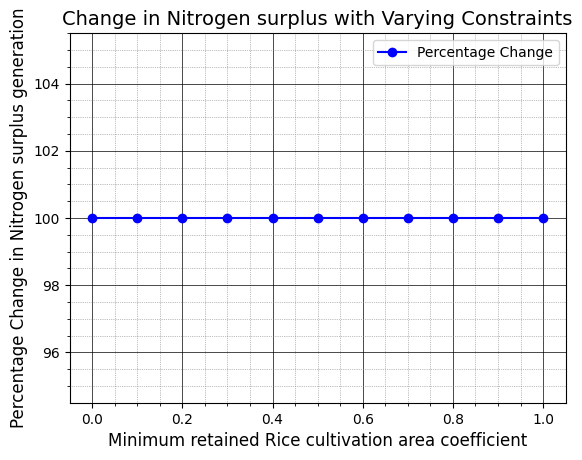

In [20]:
import matplotlib.pyplot as plt

# Assuming you have defined gamma_values and percentage_changes

plt.plot(results_df_k['Gamma'], results_df_k['Percentage Change in Nitrogen Surplus'], marker='o', linestyle='-', color='b', label='Percentage Change')
plt.xlabel('Minimum retained Rice cultivation area coefficient', fontsize=12)
plt.ylabel('Percentage Change in Nitrogen surplus generation', fontsize=12)
plt.title('Change in Nitrogen surplus with Varying Constraints', fontsize=14)
plt.grid(True)

# Customize the grid lines
plt.gca().set_axisbelow(True)  # Move grid lines behind the plot
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Save the figure
#plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\cultural_significance_kharif.png', dpi=300)  

# Show the plot
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1,) and (11,)

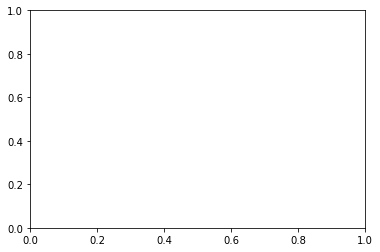